# Here some intro text

In [1]:
# import libraries:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing dataset and first glance:
iris = pd.read_csv('iris-data.csv')
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# look at some characteristics:
print(iris.shape)
print('\n')
print(iris.dtypes)
print('\n')
print(iris.isnull().sum())
print('\n')
print(iris['class'].value_counts())

(150, 5)


sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object


sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64


Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64


In [4]:
# From the above I can see that we miss 5 values in the petal_width_cm column, as we do have enough values in the
# petal_length_cm these are really missing.

# Also we can see that 6 values in the class column are labeled incorrectly.

# These are already two things we need to improve to our dataset

In [5]:
# some more characteristics:
iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,150.0,5.644627,1.312781,0.055,5.1,5.70,6.4,7.9
sepal_width_cm,150.0,3.054667,0.433123,2.000,2.8,3.00,3.3,4.4
petal_length_cm,150.0,3.758667,1.764420,1.000,1.6,4.35,5.1,6.9
petal_width_cm,145.0,1.236552,0.755058,0.100,0.4,1.30,1.8,2.5


In [6]:
iris_with_nulls = iris[iris.isnull().any(axis=1)]
iris_with_nulls

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


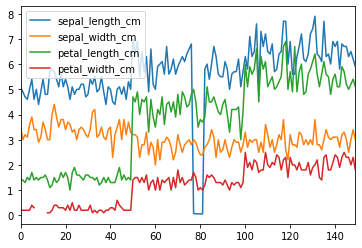

In [7]:
# looking at some plots:
iris.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dc6315cd0>,
      dtype=object)

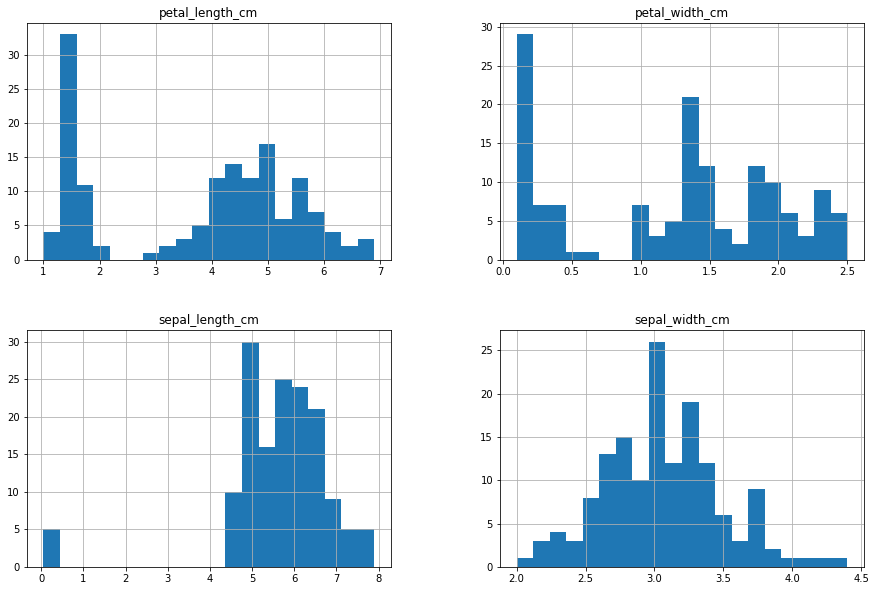

In [8]:
iris.hist(bins=20, figsize=(15,10))

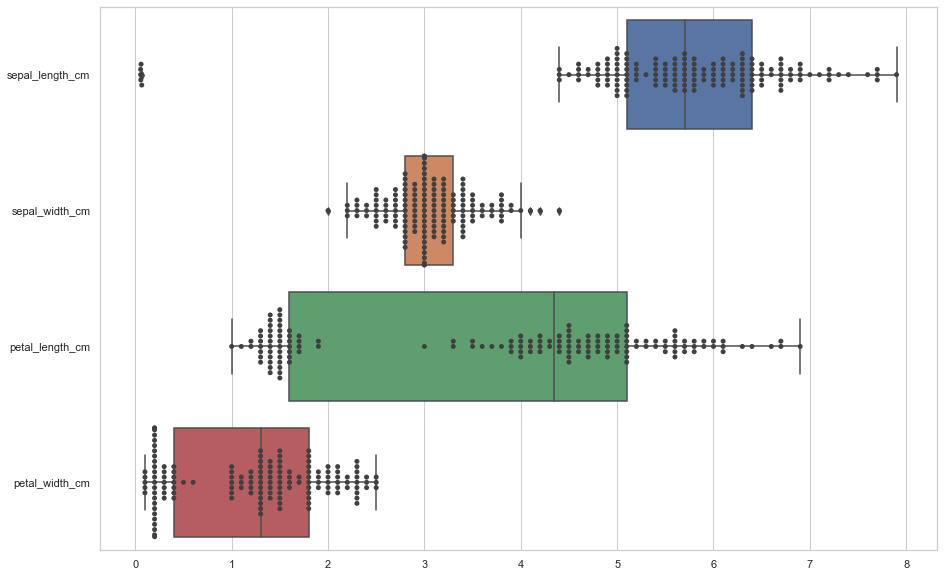

In [9]:
# check on outliers
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.boxplot(data=iris, orient="h")
sns.swarmplot(data=iris, orient='h', color=".25")

In [10]:
# looks like we have some outliers in the 'sepal_lenght_cm'

/Users/vpavandijk/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vpavandijk/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


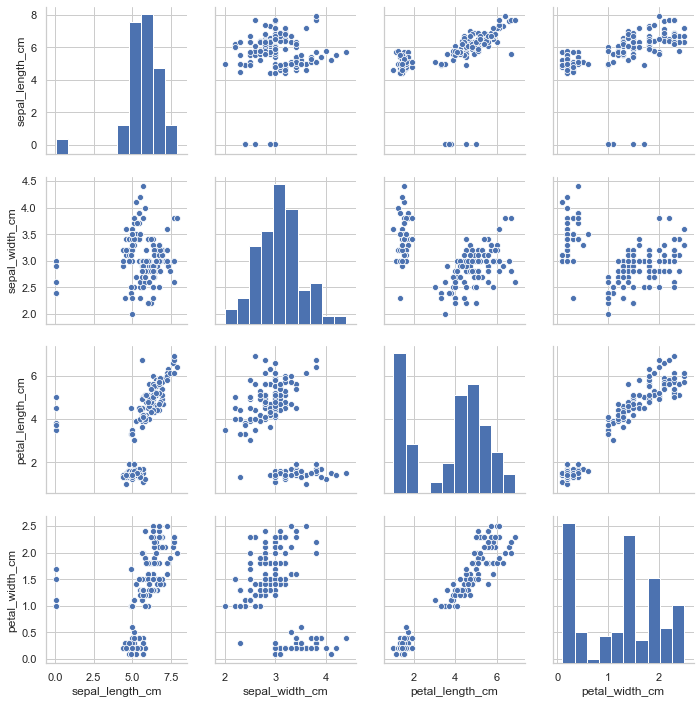

In [11]:
# Look at different scatterplots:
sns.pairplot(iris)
plt.show()

In [12]:
# check on duplicates
iris_duplicates = iris[iris.duplicated()]
iris_duplicates


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


(4.0, 0.0)

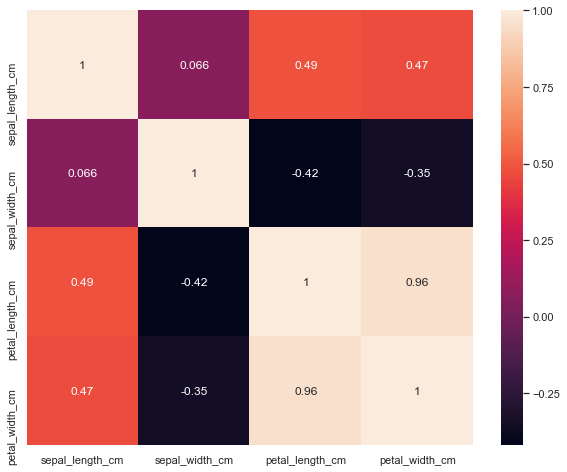

In [13]:
# correlatie bekijken mbt preffered outcome value
corr = iris.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [14]:
# co correlation?
# We can see a high correlation between 'petal_lenght' and 'petal_width'

In [15]:
# Cleaning the classes:
# I will replace the six values that are labeled incorrectly in the column class:

iris_clean = iris.copy()
iris_clean['class'] = iris_clean['class'].replace({'versicolor': 'Iris-versicolor', 'Iris-setossa': 'Iris-setosa'})
iris_clean['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [16]:
# the five rows with missing value in petal_width are all of the same class
# I will use the mean value for petal_width for this class and use that value to replace the NAN's

iris_clean_Iris_setosa = iris_clean[iris_clean['class'] == 'Iris-setosa']
iris_setosa_petal_width_mean = iris_clean_Iris_setosa['petal_width_cm'].mean()
iris_clean2 = iris_clean.copy()
iris_clean2['petal_width_cm'] = iris_clean2['petal_width_cm'].fillna(iris_setosa_petal_width_mean)
iris_clean2.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [17]:
# now looking at the outliers:
iris_length = iris_clean2[iris_clean2['sepal_length_cm'] < 1]
print(iris_clean2['sepal_length_cm'].mean())
iris_length

5.644626666666667


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [18]:
# again all of the same class.
# I will calculate the mean for this class and replace the values.

iris_Iris_versicolor = iris_clean2[iris_clean2['class'] == 'Iris-versicolor']
iris_versicolor_sepal_length_mean = iris_Iris_versicolor['sepal_length_cm'].mean()
print(iris_versicolor_sepal_length_mean)
iris_Iris_versicolor2 = iris_Iris_versicolor[iris_Iris_versicolor['sepal_length_cm'] > 1]
iris_versicolor_sepal_length_mean2 = iris_Iris_versicolor2['sepal_length_cm'].mean()
print(iris_versicolor_sepal_length_mean2)


iris_clean3 = iris_clean2.copy()
iris_clean3.loc[iris_clean3['sepal_length_cm'] < 1, 'sepal_length_cm'] = iris_versicolor_sepal_length_mean2
iris_clean3
print(iris_clean2['sepal_length_cm'].mean())
print(iris_clean3['sepal_length_cm'].mean())

#double check
iris_length2 = iris_clean3[iris_clean3['sepal_length_cm'] < 1]
iris_length2


5.35388
5.942222222222223
5.644626666666667
5.840740740740741


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [19]:
iris_clean3.to_csv('iris-data-clean.csv')